<a href="https://colab.research.google.com/github/Ak-ai-coder/ml-2/blob/main/mlv3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

bank = '/content/drive/MyDrive/bank-full.csv'
df = pd.read_csv((bank), delimiter=';', quotechar='"')

Mounted at /content/drive


In [34]:
# Import libraries
import pandas as pd
from collections import Counter

# Load the dataset
dataset_path = '/content/drive/MyDrive/bank-full.csv'
data = pd.read_csv(dataset_path, delimiter=';', quotechar='"')

# Display basic information about the dataset
print("Dataset Overview:")
print("- Number of Rows:", data.shape[0])
print("- Number of Columns:", data.shape[1])
print("\nSample Records:")
print(data.head())

# Check for missing values in the dataset
print("\nMissing Values Summary:")
print(data.isnull().sum())

# Analyze the distribution of the target variable
target_column = 'y'
print("\nTarget Variable Distribution:")
print(Counter(data[target_column]))

#  basic statistical summaries for numeric columns
print("\nStatistical Summary for Numeric Features:")
print(data.describe())

# Identify categorical features in the dataset
categorical_columns = data.select_dtypes(include=['object']).columns
print("\nCategorical Features:")
print(categorical_columns.tolist())

# Display unique values in each categorical column
for col in categorical_columns:
    print(f"\nUnique Values in '{col}':")
    print(data[col].unique())

Dataset Overview:
- Number of Rows: 45211
- Number of Columns: 17

Sample Records:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  

Missing Values Summary:
age

In [2]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
num_rows = df.shape[0]
print(num_rows)
df.info()

45211
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# Exploratory Data Analysis

*   Find Unwanted columns
*   Find Missing Values
*   Find Features with one values
*  Explore categorical features
* Find categorical feature distribution
* Relationship between categorical features and label
* Explore numerical features
* Find discrete numerical features
* Relation between discrete numerical features and label
* Find continous numerical features
* Distribution of continous numerical features
* Relation between continous numerical features and labels
* Find outliers in numerical features
* Explore the correlation between numerical features

* check the dataset is balanced or not based on target values




Unwanted Columns (One Value or >50% Missing):
[]

Missing Values Per Column:
Series([], dtype: int64)

Features with Only One Unique Value:
[]

Categorical Features:
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


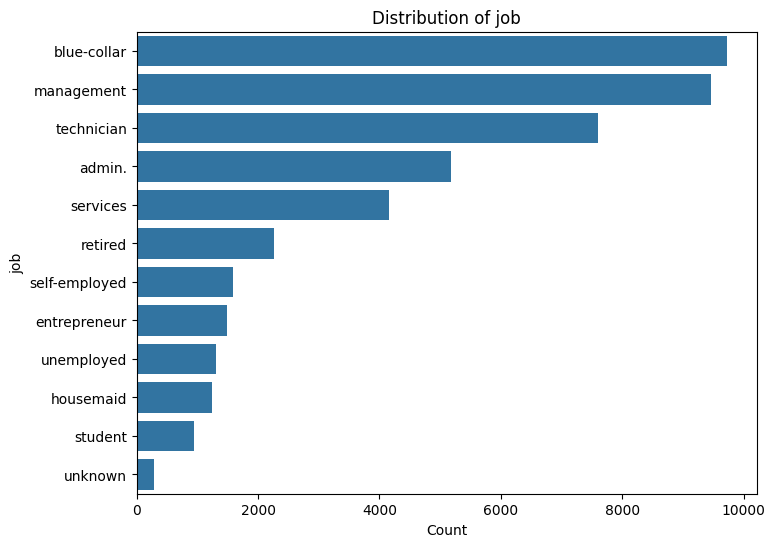

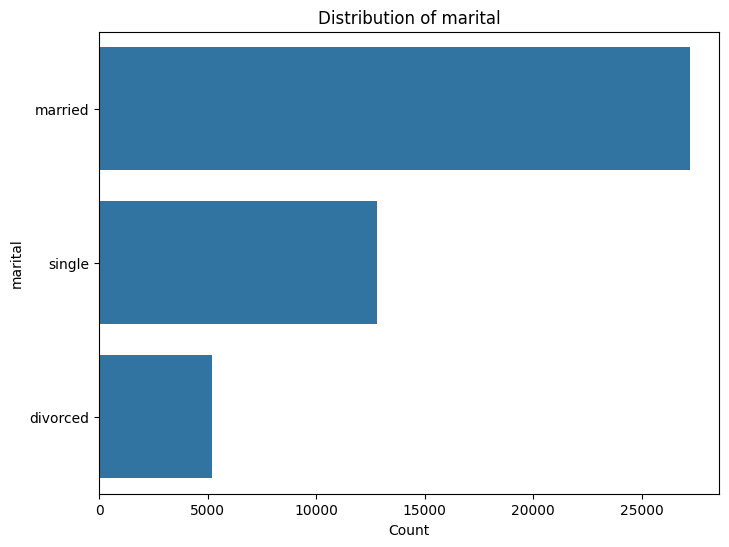

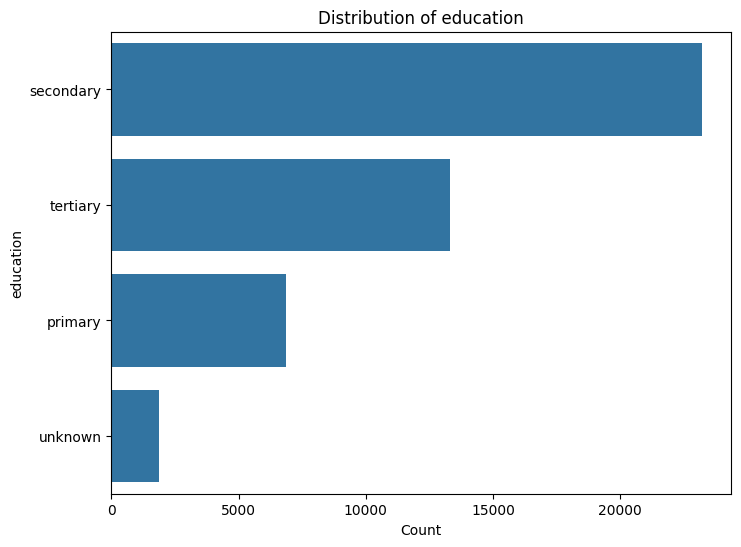

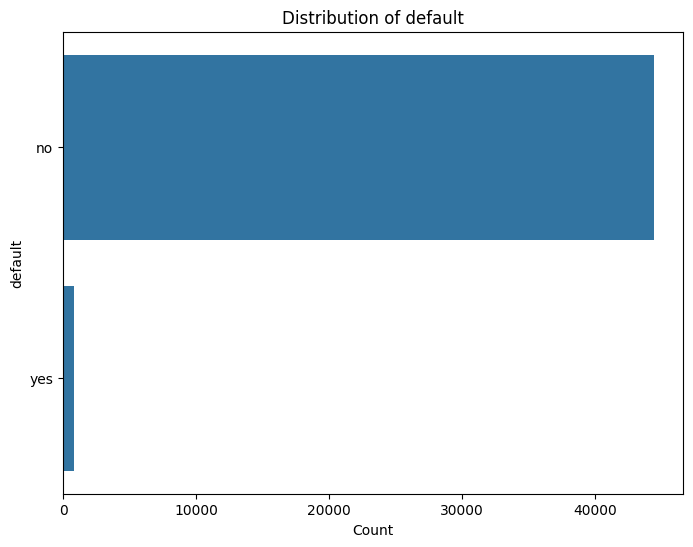

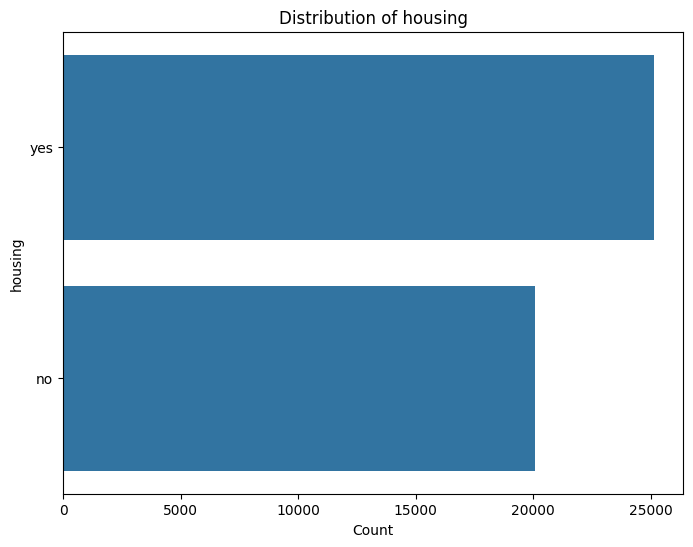

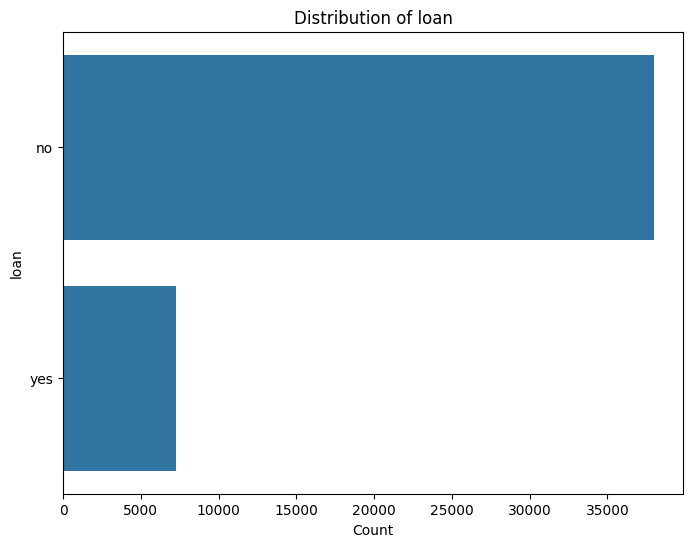

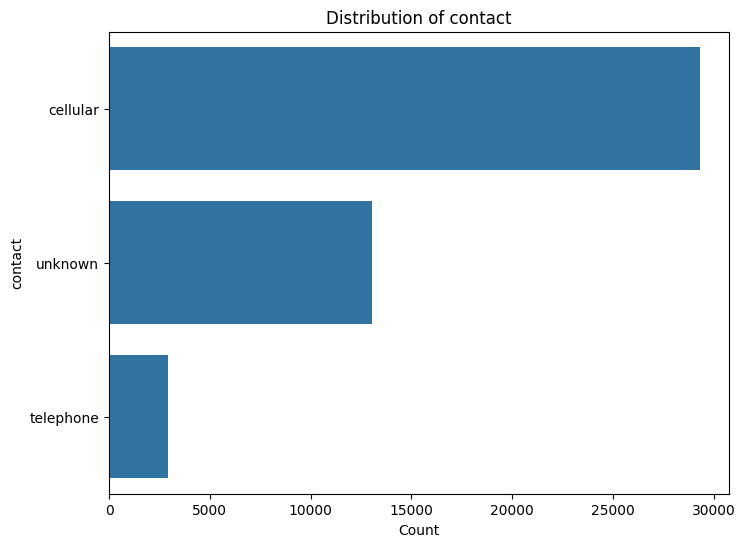

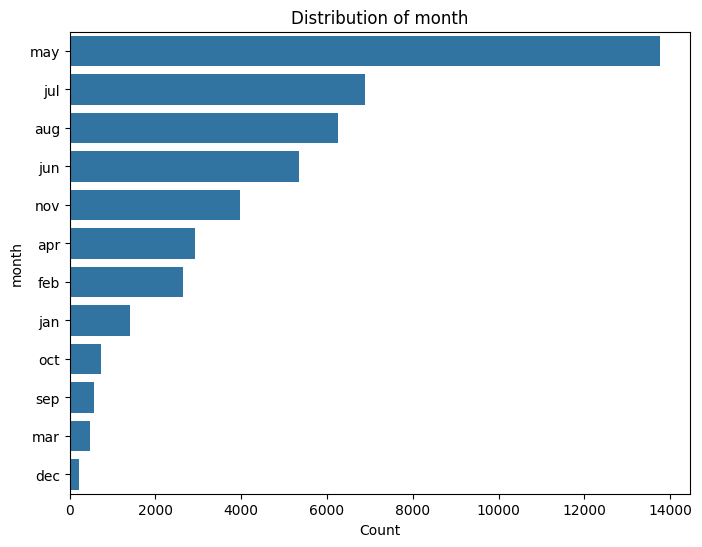

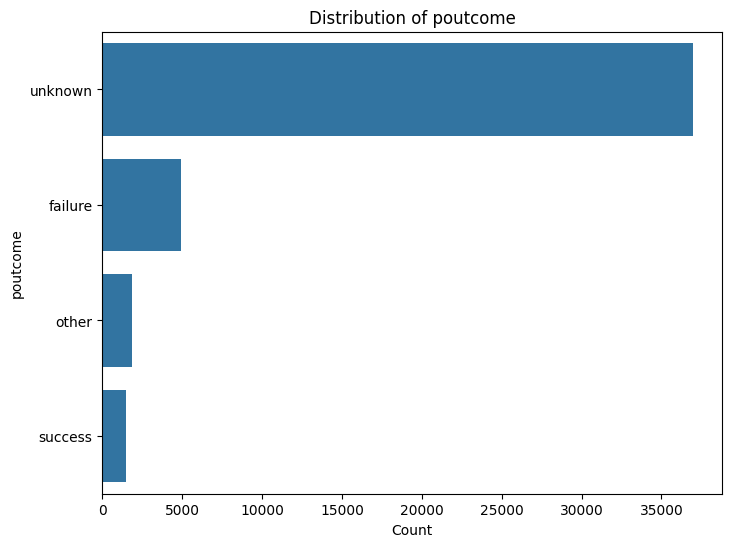

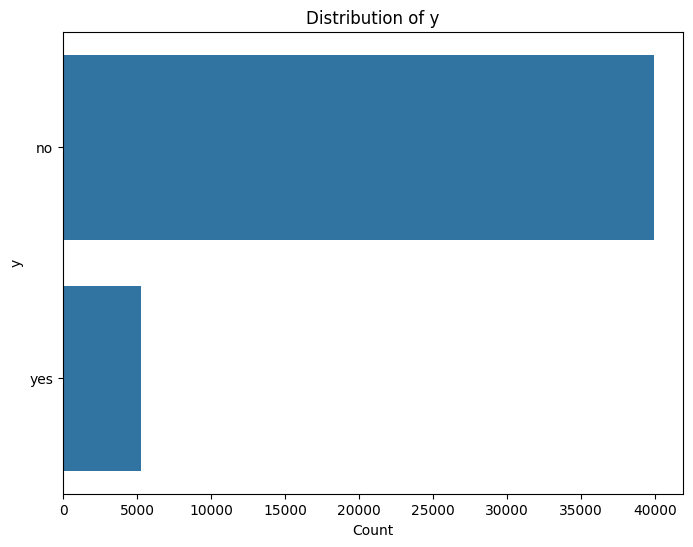

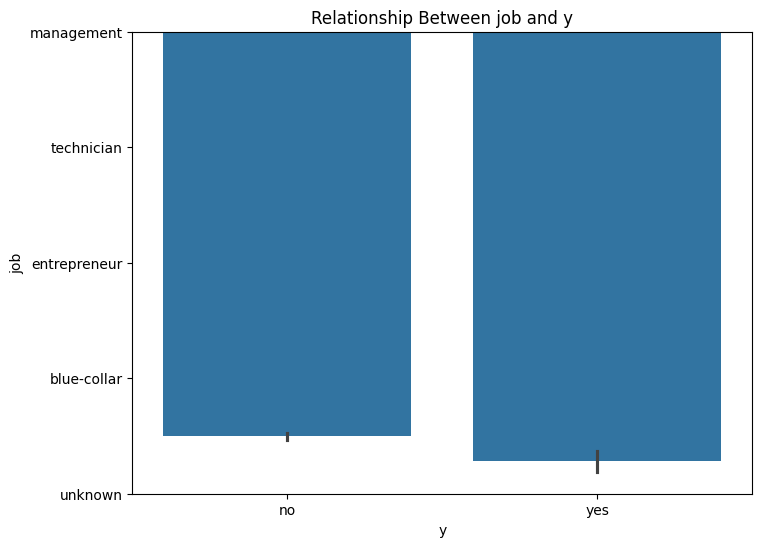

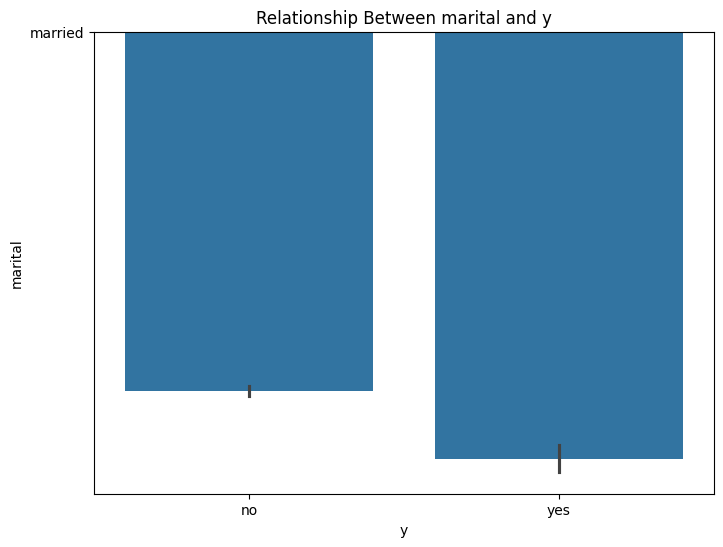

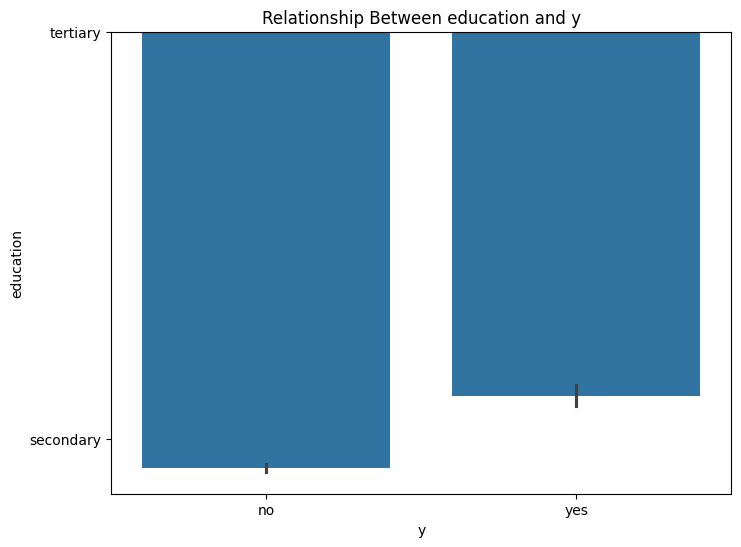

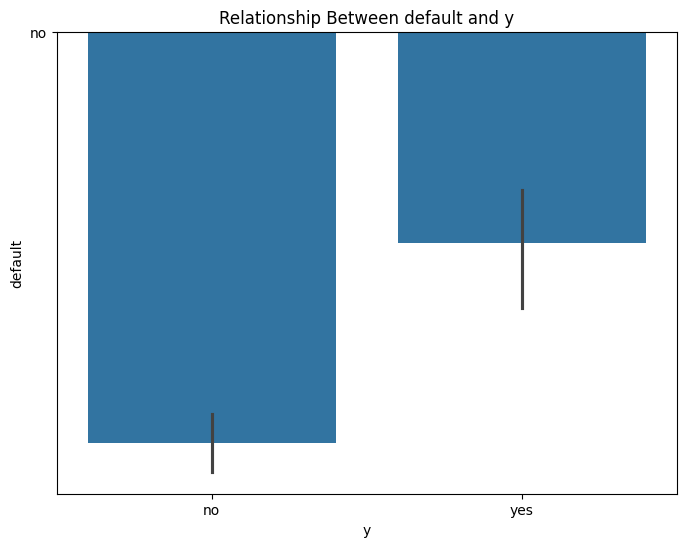

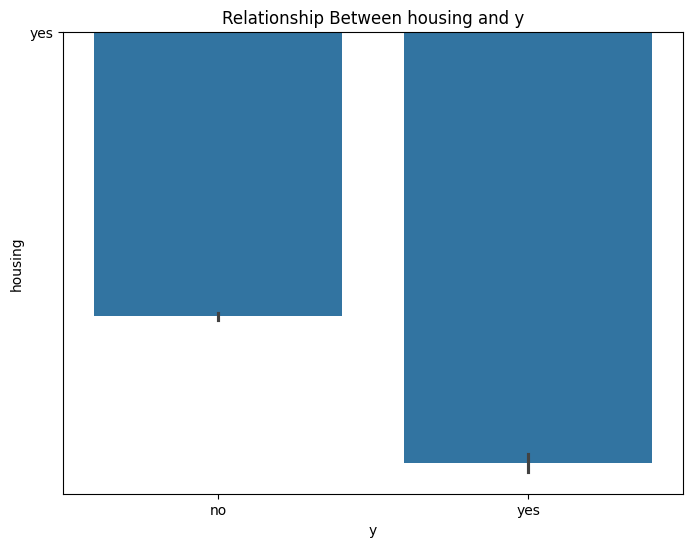

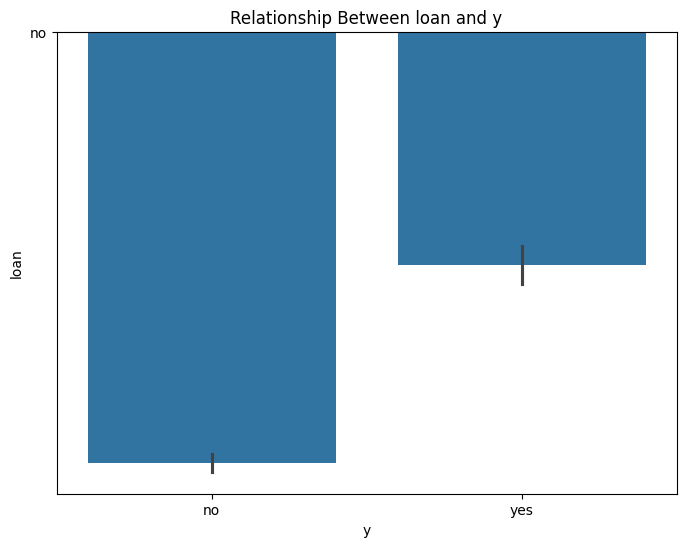

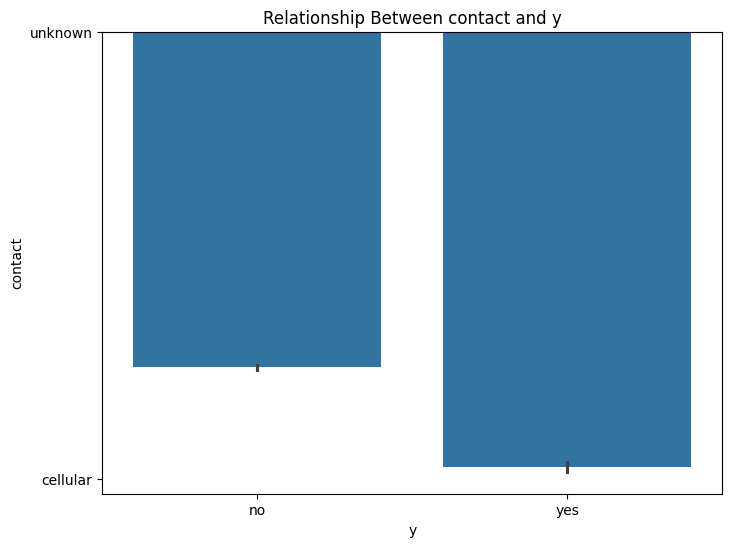

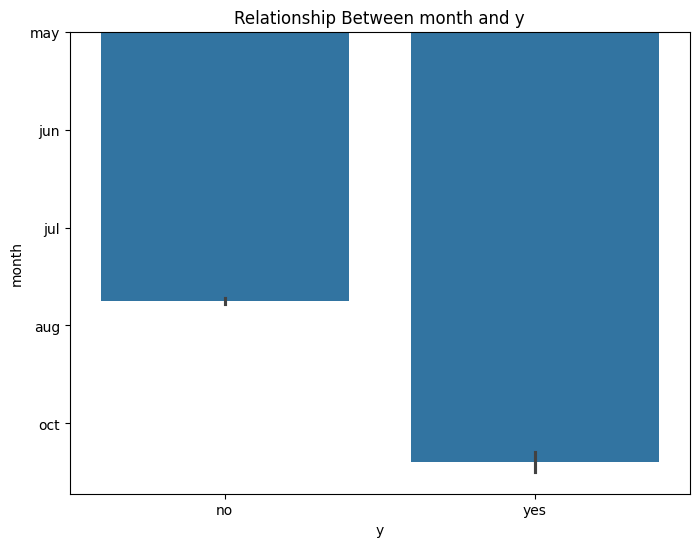

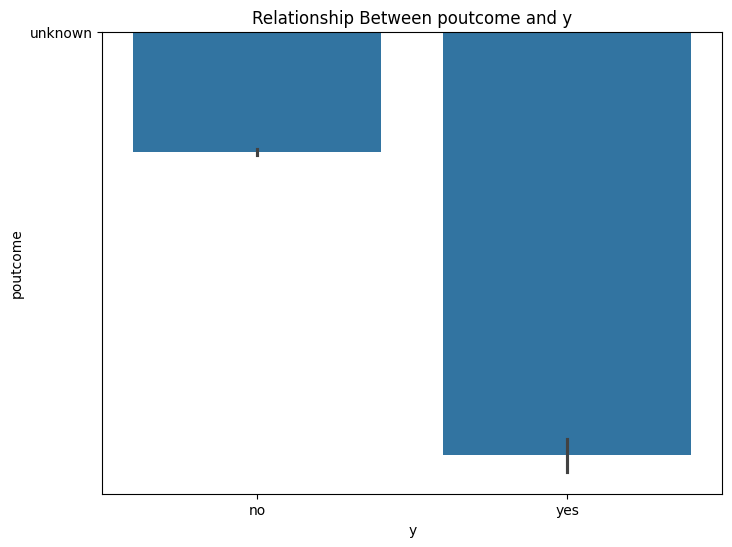

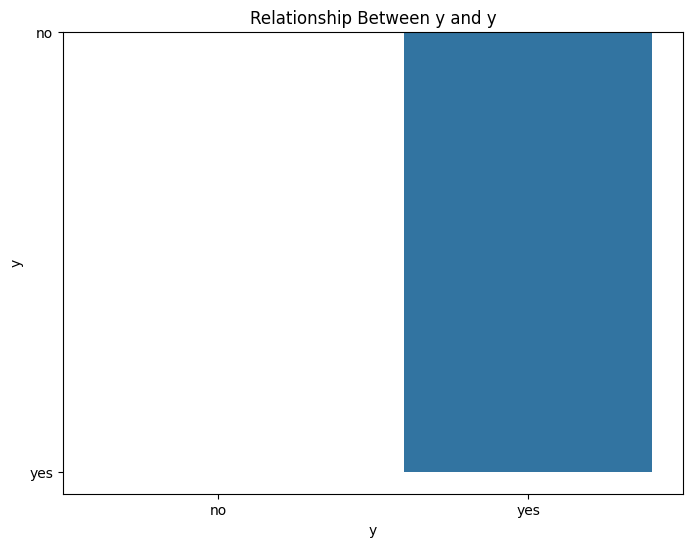


Numerical Features:
Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

Discrete Numerical Features:
[]

Continuous Numerical Features:
['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


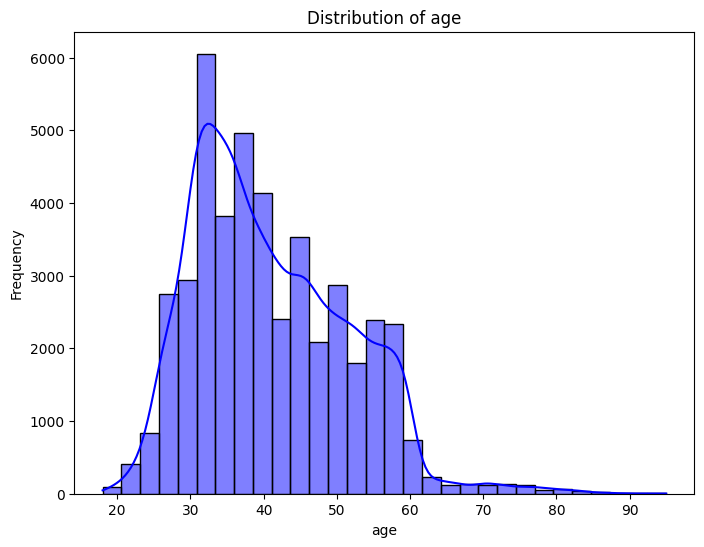

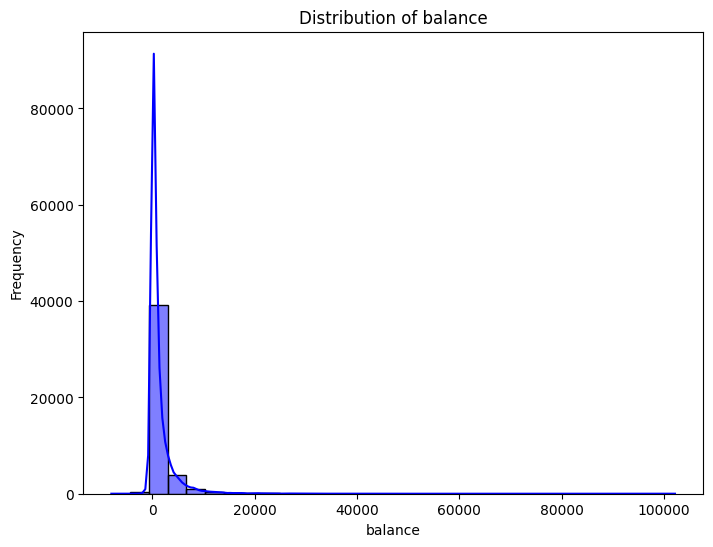

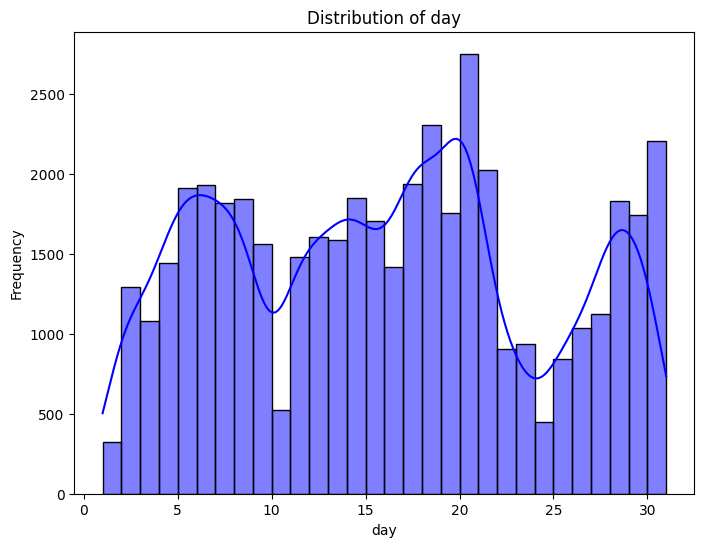

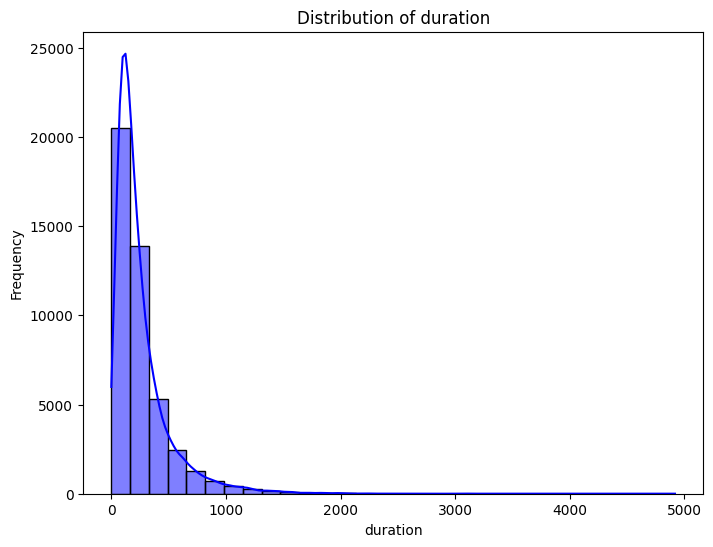

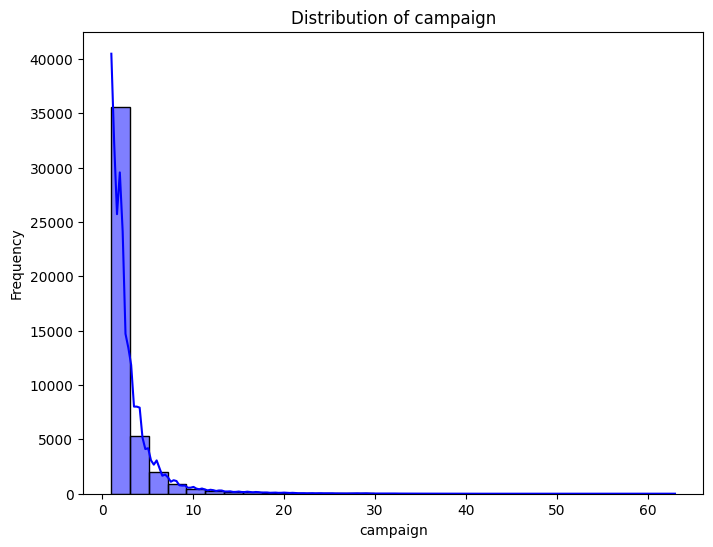

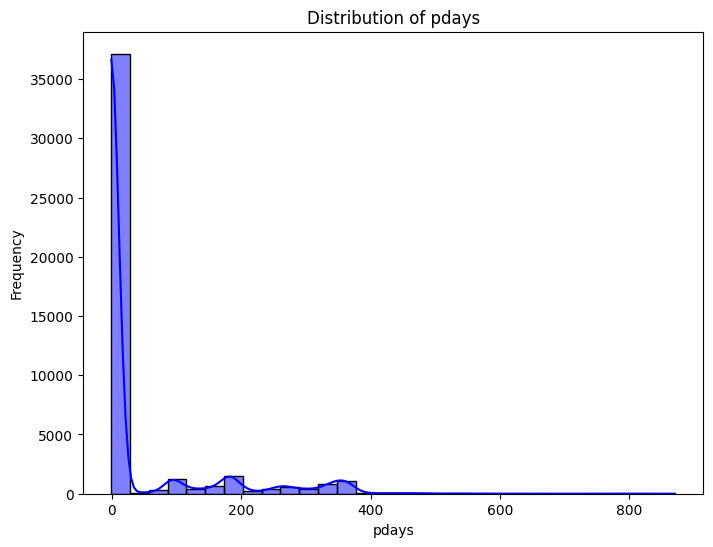

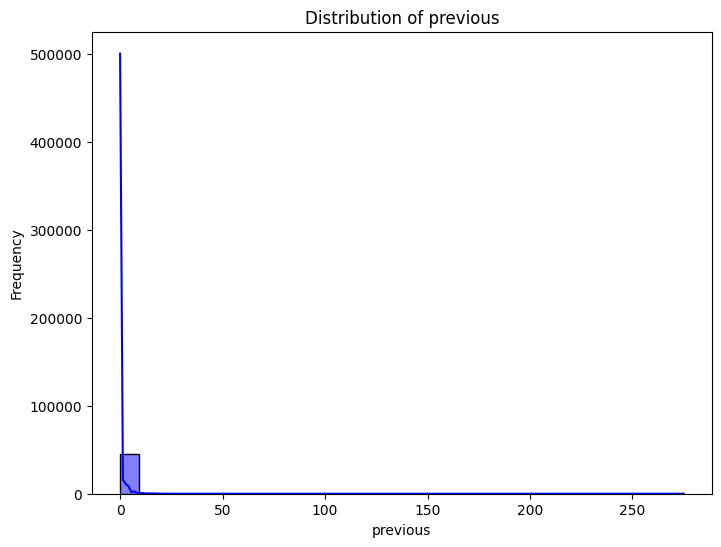

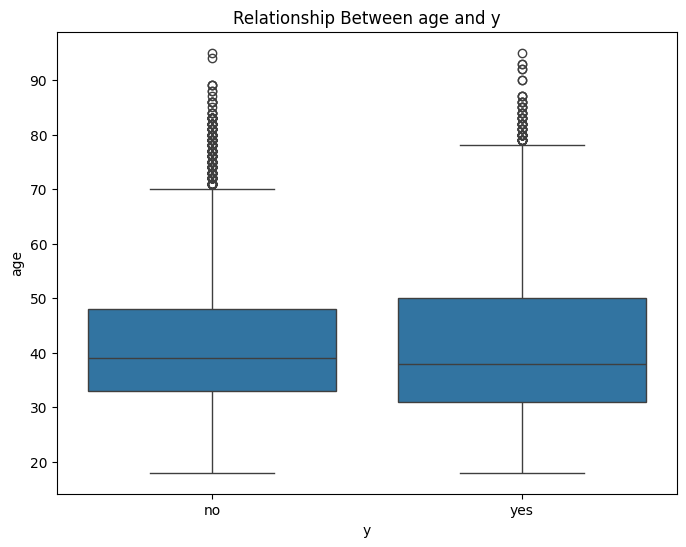

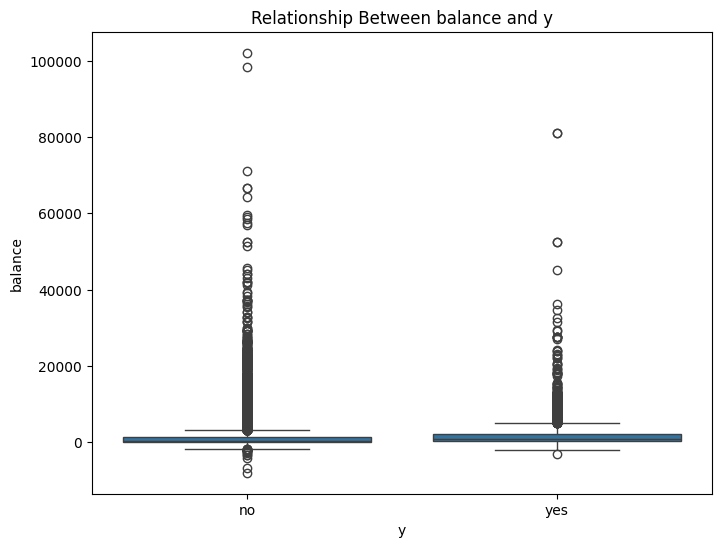

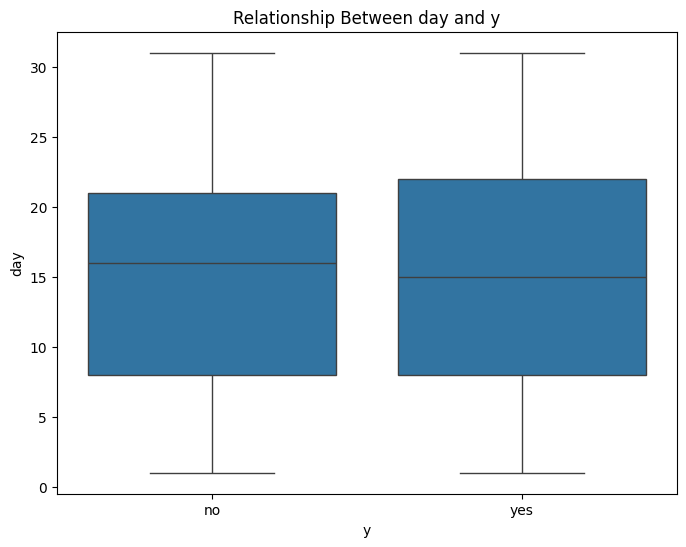

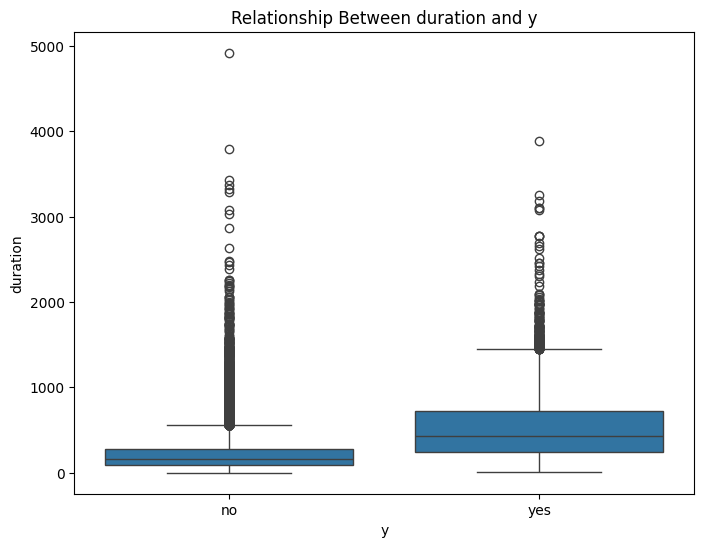

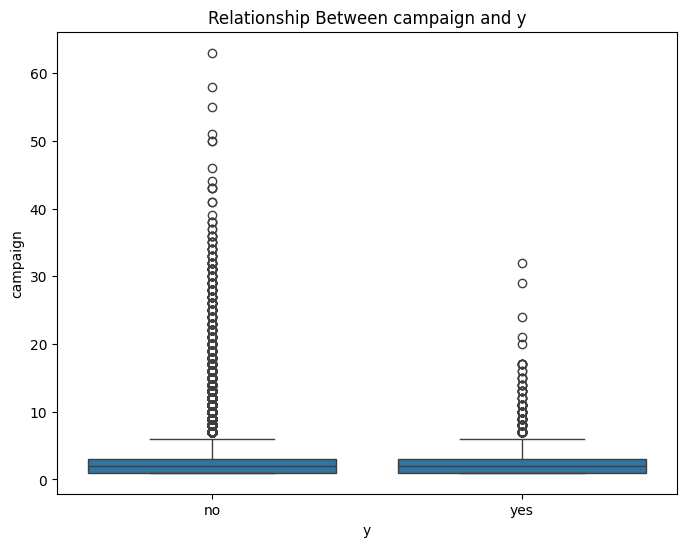

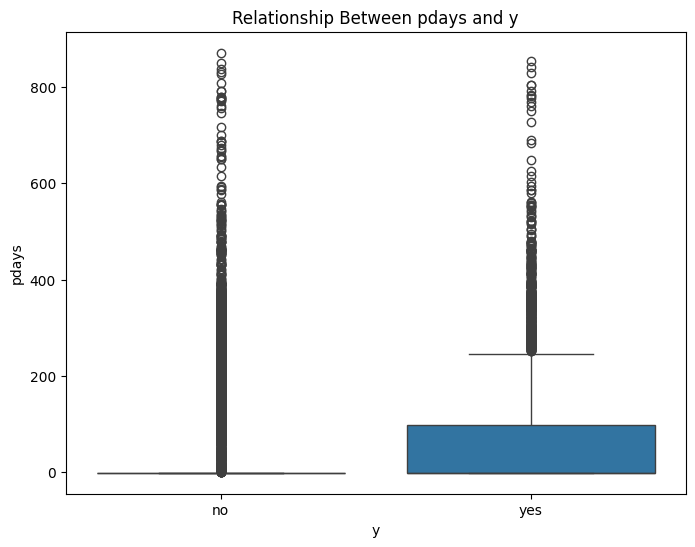

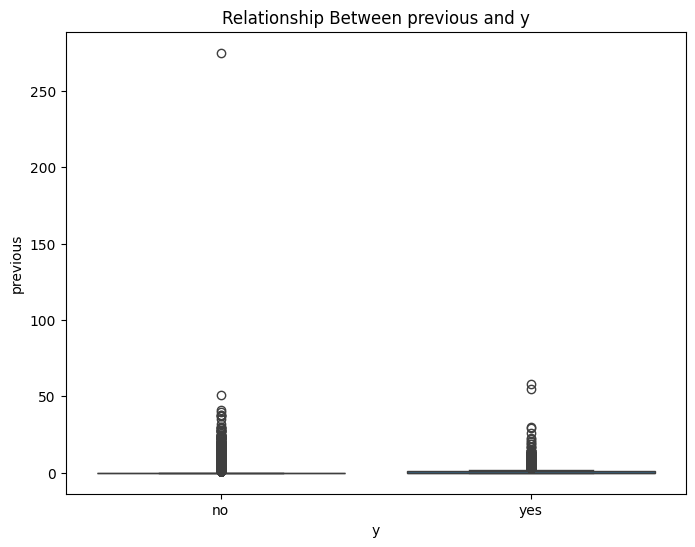


Outliers in Numerical Features:
age: 487 outliers
balance: 4729 outliers
day: 0 outliers
duration: 3235 outliers
campaign: 3064 outliers
pdays: 8257 outliers
previous: 8257 outliers

Correlation Matrix:
               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.097783 -0.009120 -0.004648  0.004760 -0.023758  0.001288
balance   0.097783  1.000000  0.004503  0.021560 -0.014578  0.003435  0.016674
day      -0.009120  0.004503  1.000000 -0.030206  0.162490 -0.093044 -0.051710
duration -0.004648  0.021560 -0.030206  1.000000 -0.084570 -0.001565  0.001203
campaign  0.004760 -0.014578  0.162490 -0.084570  1.000000 -0.088628 -0.032855
pdays    -0.023758  0.003435 -0.093044 -0.001565 -0.088628  1.000000  0.454820
previous  0.001288  0.016674 -0.051710  0.001203 -0.032855  0.454820  1.000000


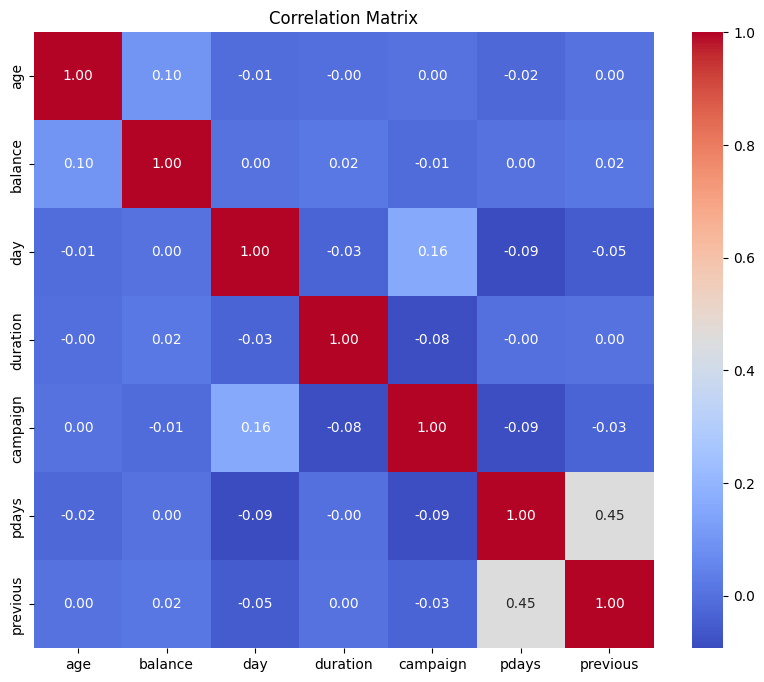


Checking Dataset Balance Based on Target Variable:
no: 39922 (88.30%)
yes: 5289 (11.70%)


In [41]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

target_column = 'y'

# Step 1: Find Unwanted Columns
def find_unwanted_columns(df):
    unwanted_cols = [col for col in df.columns if df[col].nunique() == 1 or df[col].isnull().mean() > 0.5]
    print("\nUnwanted Columns (One Value or >50% Missing):")
    print(unwanted_cols)
    return unwanted_cols

unwanted_columns = find_unwanted_columns(data)

# Step 2: Find Missing Values
def find_missing_values(df):
    print("\nMissing Values Per Column:")
    missing = df.isnull().sum()
    print(missing[missing > 0])

find_missing_values(data)

# Step 3: Find Features with One Unique Value
def find_one_value_features(df):
    one_value_cols = [col for col in df.columns if df[col].nunique() == 1]
    print("\nFeatures with Only One Unique Value:")
    print(one_value_cols)
    return one_value_cols

one_value_features = find_one_value_features(data)

# Step 4: Explore Categorical Features
def explore_categorical_features(df):
    categorical_cols = df.select_dtypes(include=['object']).columns
    print("\nCategorical Features:")
    print(categorical_cols)
    return categorical_cols

categorical_features = explore_categorical_features(data)

# Step 5: Categorical Feature Distribution
def categorical_feature_distribution(df, categorical_cols):
    for col in categorical_cols:
        plt.figure(figsize=(8, 6))
        sns.countplot(y=col, data=df, order=df[col].value_counts().index,  legend=False)
        plt.title(f"Distribution of {col}")
        plt.xlabel("Count")
        plt.ylabel(col)
        plt.show()

categorical_feature_distribution(data, categorical_features)

# Step 6: Relationship Between Categorical Features and Label
def categorical_vs_label(df, categorical_cols, target):
    for col in categorical_cols:
        plt.figure(figsize=(8, 6))
        sns.barplot(x=target, y=col, data=df, legend=False)
        plt.title(f"Relationship Between {col} and {target}")
        plt.ylabel(col)
        plt.xlabel(target)
        plt.show()

categorical_vs_label(data, categorical_features, target_column)

# Step 7: Explore Numerical Features
def explore_numerical_features(df):
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    print("\nNumerical Features:")
    print(numerical_cols)
    return numerical_cols

numerical_features = explore_numerical_features(data)

# Step 8: Find Discrete Numerical Features
def find_discrete_features(df, numerical_cols):
    discrete_features = [col for col in numerical_cols if df[col].nunique() < 15]
    print("\nDiscrete Numerical Features:")
    print(discrete_features)
    return discrete_features

discrete_features = find_discrete_features(data, numerical_features)

# Step 9: Relationship Between Discrete Features and Label
def discrete_vs_label(df, discrete_cols, target):
    for col in discrete_cols:
        plt.figure(figsize=(8, 6))
        sns.barplot(x=col, y=target, data=df,  legend=False)
        plt.title(f"Relationship Between {col} and {target}")
        plt.ylabel(target)
        plt.xlabel(col)
        plt.show()

discrete_vs_label(data, discrete_features, target_column)

# Step 10: Find Continuous Numerical Features
def find_continuous_features(df, numerical_cols):
    continuous_features = [col for col in numerical_cols if df[col].nunique() >= 15]
    print("\nContinuous Numerical Features:")
    print(continuous_features)
    return continuous_features

continuous_features = find_continuous_features(data, numerical_features)

# Step 11: Distribution of Continuous Numerical Features
def continuous_feature_distribution(df, continuous_cols):
    for col in continuous_cols:
        plt.figure(figsize=(8, 6))
        sns.histplot(df[col], kde=True, bins=30, color='blue')
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.show()

continuous_feature_distribution(data, continuous_features)

# Step 12: Relationship Between Continuous Features and Label
def continuous_vs_label(df, continuous_cols, target):
    for col in continuous_cols:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=target, y=col, data=df, hue=None, legend=False)
        plt.title(f"Relationship Between {col} and {target}")
        plt.ylabel(col)
        plt.xlabel(target)
        plt.show()

continuous_vs_label(data, continuous_features, target_column)

# Step 13: Find Outliers in Numerical Features
def find_outliers(df, numerical_cols):
    print("\nOutliers in Numerical Features:")
    for col in numerical_cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        print(f"{col}: {len(outliers)} outliers")

find_outliers(data, numerical_features)

# Step 14: Explore Correlation Between Numerical Features
def explore_correlation(df, numerical_cols):
    correlation_matrix = df[numerical_cols].corr()
    print("\nCorrelation Matrix:")
    print(correlation_matrix)
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title("Correlation Matrix")
    plt.show()

explore_correlation(data, numerical_features)

# Step 15: Check Dataset Balance
def check_balance(df, target):
    print("\nChecking Dataset Balance Based on Target Variable:")
    target_counts = Counter(df[target])
    for label, count in target_counts.items():
        print(f"{label}: {count} ({count / len(df) * 100:.2f}%)")

check_balance(data, target_column)

Class Distribution of Target Variable (y):
y
no     39922
yes     5289
Name: count, dtype: int64


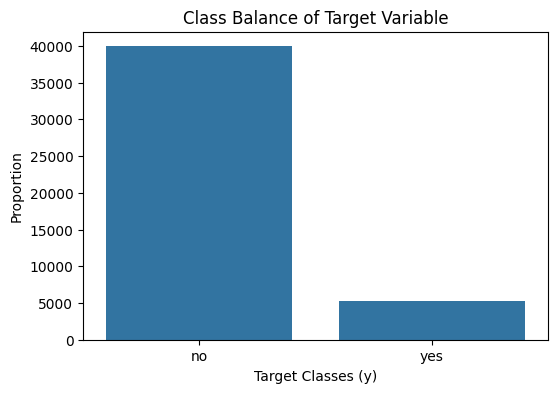

In [20]:
# Check the class distribution of target variable
class_distribution = df['y'].value_counts(normalize=False)
print("Class Distribution of Target Variable (y):")
print(class_distribution)

# Bar plot of class distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.title('Class Balance of Target Variable')
plt.xlabel('Target Classes (y)')
plt.ylabel('Proportion')
plt.show()

# Feature Engineering




* Drop Unwanted features
* Handle missing values
* Handle feature scaling
* Remove outliers

**As per the data analysis we have founf:**

* no missing values
* no feature with one value
* 9 categorical features
* default features dont play an important role
* some outliers were found(age,balance,day,duration and campaign)







In [2]:
df2=df.copy()
df2.head
df2.shape

(45211, 17)

In [9]:
#drop unwanted features
df2.groupby(['y','default']).size()
df2.drop(['default'],axis=1,inplace=True)

In [10]:
df2.groupby(['y','previous']).size()
df2.drop(['previous'],axis=1,inplace=True)
df2['default'] = df['default']

In [11]:
df2.drop(['duration'],axis=1,inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   balance    45211 non-null  int64 
 5   housing    45211 non-null  object
 6   loan       45211 non-null  object
 7   contact    45211 non-null  object
 8   day        45211 non-null  int64 
 9   month      45211 non-null  object
 10  campaign   45211 non-null  int64 
 11  pdays      45211 non-null  int64 
 12  poutcome   45211 non-null  object
 13  y          45211 non-null  object
 14  default    45211 non-null  object
dtypes: int64(5), object(10)
memory usage: 5.2+ MB


In [12]:
df2.drop(['pdays'],axis=1,inplace=True)

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   balance    45211 non-null  int64 
 5   housing    45211 non-null  object
 6   loan       45211 non-null  object
 7   contact    45211 non-null  object
 8   day        45211 non-null  int64 
 9   month      45211 non-null  object
 10  campaign   45211 non-null  int64 
 11  poutcome   45211 non-null  object
 12  y          45211 non-null  object
 13  default    45211 non-null  object
dtypes: int64(4), object(10)
memory usage: 4.8+ MB


In [14]:
df2.drop(['default'],axis=1,inplace=True)

In [15]:
#remove outliers in age
df2.groupby(['y','age'],sort=True)['age'].count()

y    age
no   18      5
     19     24
     20     35
     21     57
     22     89
            ..
yes  87      3
     90      2
     92      2
     93      2
     95      1
Name: age, Length: 148, dtype: int64

In [16]:
#remove outliers in campaign
df2.groupby(['y','campaign'],sort=True)['campaign'].count()

y    campaign
no   1           14983
     2           11104
     3            4903
     4            3205
     5            1625
                 ...  
yes  20              1
     21              1
     24              1
     29              1
     32              1
Name: campaign, Length: 70, dtype: int64

In [17]:
#remove outliers in balance
df2.groupby(['y','balance'],sort=True)['balance'].count()

y    balance
no   -8019      1
     -6847      1
     -4057      1
     -3372      1
     -3313      1
               ..
yes   34646     1
      36252     1
      45248     1
      52587     2
      81204     2
Name: balance, Length: 9258, dtype: int64

In [18]:
categorical_columns = df2.select_dtypes(include=['object']).columns

# Apply One-Hot Encoding to all categorical columns
df2_encoded = pd.get_dummies(df2, columns=categorical_columns, drop_first=False)

# Convert boolean columns
df2_encoded = df2_encoded.astype(int)
print("Categorical columns one-hot encoded and converted to 0/1!")
print(df2_encoded.head())

Categorical columns one-hot encoded and converted to 0/1!
   age  balance  day  campaign  job_admin.  job_blue-collar  job_entrepreneur  \
0   58     2143    5         1           0                0                 0   
1   44       29    5         1           0                0                 0   
2   33        2    5         1           0                0                 1   
3   47     1506    5         1           0                1                 0   
4   33        1    5         1           0                0                 0   

   job_housemaid  job_management  job_retired  ...  month_may  month_nov  \
0              0               1            0  ...          1          0   
1              0               0            0  ...          1          0   
2              0               0            0  ...          1          0   
3              0               0            0  ...          1          0   
4              0               0            0  ...          1          0   

In [19]:
# Apply one hot encoding
df2_encoded['y'] = df2_encoded['y_yes']
df2_encoded = df2_encoded.drop(['y_no', 'y_yes'], axis=1)
from sklearn.model_selection import train_test_split


X = df2_encoded.drop('y', axis=1)
y = df2_encoded['y']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (36168, 46)
Shape of X_test: (9043, 46)
Shape of y_train: (36168,)
Shape of y_test: (9043,)


In [20]:
print(df2_encoded.columns)

Index(['age', 'balance', 'day', 'campaign', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'housing_no', 'housing_yes',
       'loan_no', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'contact_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'y'],
      dtype='object')


# Random forest

Initializing the Random Forest model...

Training the model on the training data...

Generating predictions on the test data...

Evaluating model performance...

Model Accuracy: 0.8919

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.64      0.23      0.34      1091

    accuracy                           0.89      9043
   macro avg       0.77      0.61      0.64      9043
weighted avg       0.87      0.89      0.87      9043


Confusion Matrix:
[[7810  142]
 [ 836  255]]


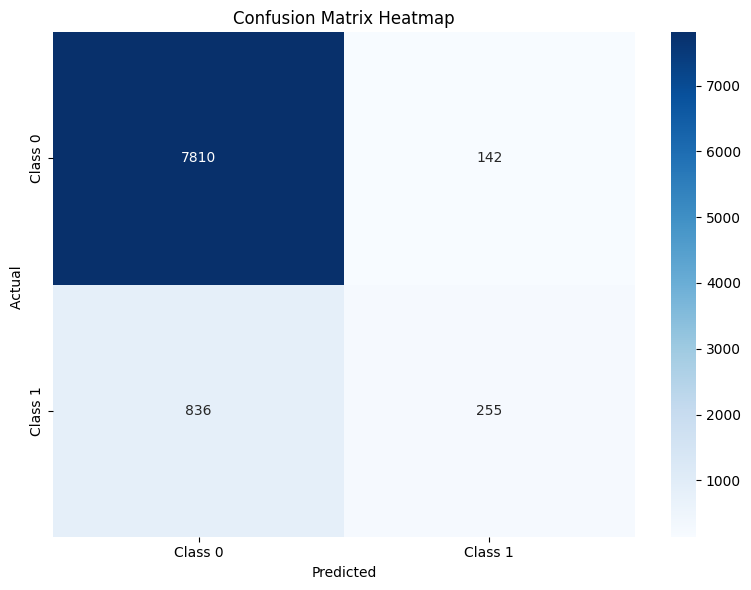

In [45]:
# Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: number of features to consider for the root node
max_features_for_root = 15

# Step 2: Initialize and configure the Random Forest model
print("Initializing the Random Forest model...")
random_forest_model = RandomForestClassifier(
    max_features=max_features_for_root,  # Features to consider at the root node
    class_weight='balanced',             # Handle class imbalance
    random_state=42
)

# Step 3: Train the Random Forest model
print("\nTraining the model on the training data...")
random_forest_model.fit(X_train, y_train)

# Step 4: Generate predictions on the test dataset
print("\nGenerating predictions on the test data...")
rf_predictions = random_forest_model.predict(X_test)

# Step 5: Evaluate the model's performance
print("\nEvaluating model performance...")
accuracy = accuracy_score(y_test, rf_predictions)
print(f"\nModel Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, rf_predictions))

# Step 6: Compute the confusion matrix
confusion_mat = confusion_matrix(y_test, rf_predictions)
print("\nConfusion Matrix:")
print(confusion_mat)

# Step 7: Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    confusion_mat,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Class 0", "Class 1"],
    yticklabels=["Class 0", "Class 1"]
)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual ")
plt.tight_layout()
plt.show()

# Neural Network

In [42]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Step 1: Normalize the features
feature_scaler = StandardScaler()
normalized_train_features = feature_scaler.fit_transform(X_train)
normalized_test_features = feature_scaler.transform(X_test)

# Step 2: Define the architecture of the neural network
model = Sequential([
    Dense(units=128, activation='relu', input_shape=(normalized_train_features.shape[1],)),  # Hidden Layer 1
    Dense(units=64, activation='relu'),  # Hidden Layer 2
    Dense(units=1, activation='sigmoid')  # Output Layer for binary classification
])

# Step 3: Compile the model with an optimizer, loss function, and evaluation metrics
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Step 4: Train the model with the training data
print("Training the neural network...")
training_history = model.fit(
    normalized_train_features,
    y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Step 5: Evaluate the model on the test set
print("Evaluating the model on the test set...")
loss, accuracy = model.evaluate(normalized_test_features, y_test)
print(f"\nModel Evaluation Results:\n- Loss: {loss:.4f}\n- Accuracy: {accuracy:.4f}")

# Step 6: Generate predictions on the test set
predicted_probabilities = model.predict(normalized_test_features)
predicted_classes = (predicted_probabilities > 0.5).astype(int)

# Step 7: Generate and display the classification report
print("\nClassification Report:")
print(classification_report(y_test, predicted_classes))

# Step 8: Save the trained model for future use
model.save('trained_neural_network_model.keras')
print("\nModel saved successfully as 'trained_neural_network_model.keras'")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training the neural network...
Epoch 1/20
905/905 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8851 - loss: 0.3276 - val_accuracy: 0.8889 - val_loss: 0.3028
Epoch 2/20
905/905 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8972 - loss: 0.2809 - val_accuracy: 0.8901 - val_loss: 0.2977
Epoch 3/20
905/905 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8960 - loss: 0.2827 - val_accuracy: 0.8900 - val_loss: 0.2987
Epoch 4/20
905/905 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8992 - loss: 0.2744 - val_accuracy: 0.8915 - val_loss: 0.2965
Epoch 5/20
905/905 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9012 - loss: 0.2717 - val_accuracy: 0.8904 - val_loss: 0.2978
Epoch 6/20
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9004 - loss: 0.2754 - val_accuracy: 0.8923 - val_loss: 0.2985
Epoch 7/20
905/905 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9013 - loss: 0.2652 - val_accuracy: 0.8904 - val_loss: 0.2983
Epoch 8/20
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9032 - 

# Random forest with pre prunning,smote and out of bag

In [28]:
# Import required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from collections import Counter

# Balance the training data using SMOTE
oversampler = SMOTE(random_state=42)
balanced_features, balanced_labels = oversampler.fit_resample(X_train, y_train)

# Print updated class distribution
print("Balanced Class Distribution in Training Set:", Counter(balanced_labels))

# Define ranges for hyperparameter tuning
num_trees = [ 50, 75, 100, 125, 150]  # Number of decision trees
tree_depth = [5, 10, 15]                 # Maximum tree depth
min_samples_to_split = [2, 5]            # Minimum samples required to split
min_samples_per_leaf = [1, 2]            # Minimum samples required at a leaf node
features_at_split = [3, 5, 7]            # Number of features considered for each split

best_settings = {}
highest_accuracy = 0
highest_oob_score = 0  # Track the best out-of-bag (OOB) score

# Grid search for the best hyperparameters
for trees in num_trees:
    for depth in tree_depth:
        for min_split in min_samples_to_split:
            for min_leaf in min_samples_per_leaf:
                for features in features_at_split:

                    # Create a Random Forest model with current parameters
                    rf_classifier = RandomForestClassifier(
                        n_estimators=trees,
                        max_depth=depth,
                        min_samples_split=min_split,
                        min_samples_leaf=min_leaf,
                        max_features=features,
                        class_weight='balanced',
                        oob_score=True,
                        random_state=42
                    )

                    # Train the model using the balanced dataset
                    rf_classifier.fit(balanced_features, balanced_labels)

                    # Evaluate OOB score
                    oob_accuracy = rf_classifier.oob_score_

                    # Test the model on the original (unbalanced) test set
                    predictions = rf_classifier.predict(X_test)
                    test_accuracy = accuracy_score(y_test, predictions)

                    # Log the results
                    print(f"Trees={trees}, Depth={depth}, MinSplit={min_split}, MinLeaf={min_leaf}, "
                          f"Features={features}, Test Acc={test_accuracy:.4f}, OOB Acc={oob_accuracy:.4f}")

                    # Update the best parameters if OOB accuracy improves
                    if oob_accuracy > highest_oob_score:
                        highest_oob_score = oob_accuracy
                        highest_accuracy = test_accuracy
                        best_settings = {
                            'n_estimators': trees,
                            'max_depth': depth,
                            'min_samples_split': min_split,
                            'min_samples_leaf': min_leaf,
                            'max_features': features
                        }

# Display the best parameters and results
print("\nOptimal Hyperparameters:")
print(best_settings)
print(f"Highest Test Accuracy: {highest_accuracy:.4f}")
print(f"Highest OOB Accuracy: {highest_oob_score:.4f}")

# Train the final model with the best parameters
final_rf_model = RandomForestClassifier(
    n_estimators=best_settings['n_estimators'],
    max_depth=best_settings['max_depth'],
    min_samples_split=best_settings['min_samples_split'],
    min_samples_leaf=best_settings['min_samples_leaf'],
    max_features=best_settings['max_features'],
    class_weight='balanced',
    oob_score=True,
    random_state=42
)
final_rf_model.fit(balanced_features, balanced_labels)

# Test the final model
final_predictions = final_rf_model.predict(X_test)
print("\nFinal Model Evaluation:")
print(f"Test Accuracy: {accuracy_score(y_test, final_predictions):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, final_predictions))

# Print final OOB accuracy
print(f"Final OOB Accuracy: {final_rf_model.oob_score_:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Balanced Class Distribution in Training Set: Counter({0: 31970, 1: 31970})
Trees=50, Depth=5, MinSplit=2, MinLeaf=1, Features=3, Test Acc=0.8543, OOB Acc=0.8806
Trees=50, Depth=5, MinSplit=2, MinLeaf=1, Features=5, Test Acc=0.8256, OOB Acc=0.8696
Trees=50, Depth=5, MinSplit=2, MinLeaf=1, Features=7, Test Acc=0.8440, OOB Acc=0.8769
Trees=50, Depth=5, MinSplit=2, MinLeaf=2, Features=3, Test Acc=0.8586, OOB Acc=0.8823
Trees=50, Depth=5, MinSplit=2, MinLeaf=2, Features=5, Test Acc=0.8262, OOB Acc=0.8697
Trees=50, Depth=5, MinSplit=2, MinLeaf=2, Features=7, Test Acc=0.8441, OOB Acc=0.8771
Trees=50, Depth=5, MinSplit=5, MinLeaf=1, Features=3, Test Acc=0.8557, OOB Acc=0.8812
Trees=50, Depth=5, MinSplit=5, MinLeaf=1, Features=5, Test Acc=0.8257, OOB Acc=0.8696
Trees=50, Depth=5, MinSplit=5, MinLeaf=1, Features=7, Test Acc=0.8442, OOB Acc=0.8771
Trees=50, Depth=5, MinSplit=5, MinLeaf=2, Features=3, Test Acc=0.8582, OOB Acc=0.8822
Trees=50, Depth=5, MinSplit=5, MinLeaf=2, Features=5, Test Acc=0.

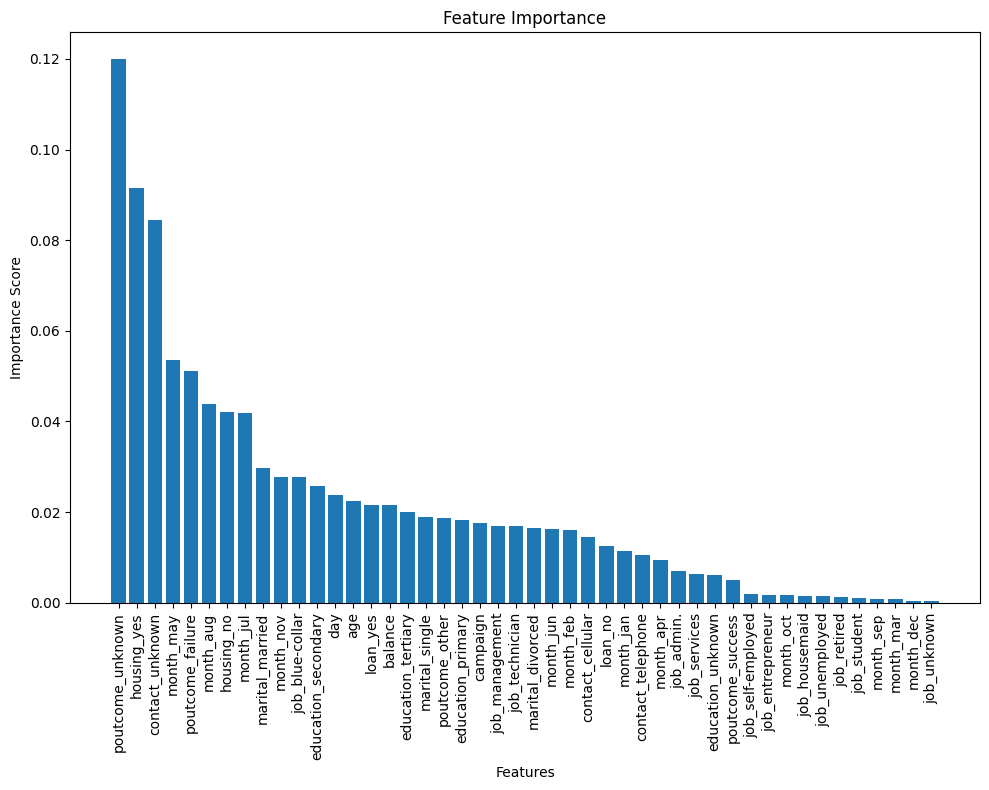

In [32]:
# Import required libraries
import matplotlib.pyplot as plt
import numpy as np


feature_importances = rf_classifier.feature_importances_
feature_names = X_train.columns
# Sort the features by importance
indices = np.argsort(feature_importances)[::-1]

# Plot the feature importance
plt.figure(figsize=(10, 8))
plt.title("Feature Importance")
plt.bar(range(len(feature_importances)), feature_importances[indices], align="center")
plt.xticks(range(len(feature_importances)), [feature_names[i] for i in indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

# Neural Network with data balancing

In [44]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter
import numpy as np

# Step 1: Analyze Original Class Distribution
print("Initial Class Distribution in Training Data:", Counter(y_train))
print("Initial Class Distribution in Testing Data:", Counter(y_test))

# Step 2: Balance the Training Dataset Using SMOTE
print("\nApplying SMOTE to balance the training dataset...")
oversampler = SMOTE(random_state=42)
balanced_train_features, balanced_train_labels = oversampler.fit_resample(X_train, y_train)
print("Balanced Class Distribution in Training Data:", Counter(balanced_train_labels))

# Step 3: Normalize Features for Neural Network Training
print("\nScaling features for uniform contribution to the model...")
scaler = StandardScaler()
scaled_train_features = scaler.fit_transform(balanced_train_features)
scaled_test_features = scaler.transform(X_test)

# Step 4: Neural Network Model
print("\nDefining the neural network architecture...")
neural_network = Sequential([
    Input(shape=(scaled_train_features.shape[1],)),  # Input Layer
    Dense(128, activation='relu'),                  # First Hidden Layer
    Dropout(0.3),                                   # Dropout Layer for Regularization
    Dense(64, activation='relu'),                   # Second Hidden Layer
    Dropout(0.3),                                   # Dropout Layer for Regularization
    Dense(1, activation='sigmoid')                  # Output Layer for Binary Classification
])

# Step 5: Compile the Model with Weighted Loss
print("\nCompiling the model with Adam optimizer and weighted loss function...")
neural_network.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Tuned Learning Rate
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Step 6:  Class Weights to Handle Imbalance
class_weights = {0: 1.0, 1: 3.0}

# Step 7: Train the Model with Class Weights
print("\nTraining the neural network with balanced data...")
training_history = neural_network.fit(
    scaled_train_features,
    balanced_train_labels,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    class_weight=class_weights,
    verbose=1
)

# Step 8: Evaluate the Model on Unbalanced Test Data
print("\nEvaluating the model on the test dataset...")
loss, accuracy = neural_network.evaluate(scaled_test_features, y_test)
print(f"\nTest Accuracy: {accuracy:.4f}")

# Step 9: Generate Predictions with Default Threshold (0.5)
print("\nGenerating predictions with the default threshold (0.5)...")
predicted_probabilities = neural_network.predict(scaled_test_features)
default_predictions = (predicted_probabilities > 0.5).astype(int)

# Step 10: Display Classification Report for Default Threshold
print("\nClassification Report (Default Threshold=0.5):")
print(classification_report(y_test, default_predictions))

# Step 11: Tune the Classification Threshold
threshold = 0.3
print(f"\nGenerating predictions with custom threshold ({threshold})...")
custom_predictions = (predicted_probabilities > threshold).astype(int)

# Step 12: Display Classification Report and Confusion Matrix for Custom Threshold
print(f"\nClassification Report (Custom Threshold={threshold}):")
print(classification_report(y_test, custom_predictions))

confusion_matrix_custom = confusion_matrix(y_test, custom_predictions)
print(f"\nConfusion Matrix (Custom Threshold={threshold}):")
print(confusion_matrix_custom)

# Step 13: Save the Trained Model
model_filename = 'neural_network_with_smote_and_weights.keras'
neural_network.save(model_filename)
print(f"\nModel saved successfully as '{model_filename}'.")

Initial Class Distribution in Training Data: Counter({0: 31970, 1: 4198})
Initial Class Distribution in Testing Data: Counter({0: 7952, 1: 1091})

Applying SMOTE to balance the training dataset...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Balanced Class Distribution in Training Data: Counter({0: 31970, 1: 31970})

Scaling features for uniform contribution to the model...

Defining the neural network architecture...

Compiling the model with Adam optimizer and weighted loss function...

Training the neural network with balanced data...
Epoch 1/20
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8409 - loss: 0.5981 - val_accuracy: 0.9949 - val_loss: 0.0131
Epoch 2/20
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9085 - loss: 0.4427 - val_accuracy: 0.9961 - val_loss: 0.0092
Epoch 3/20
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9089 - loss: 0.4345 - val_accuracy: 0.9964 - val_loss: 0.0077
Epoch 4/20
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9100 - loss: 0.4261 - val_accuracy: 0.9966 - val_loss: 0.0066
Epoch 5/20
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9148 - loss: 0.4244 - val_accuracy: 0.9963 - val_loss: 0.0056
Epoch 6/20
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms


Confusion Matrix:
[[7434  518]
 [ 584  507]]


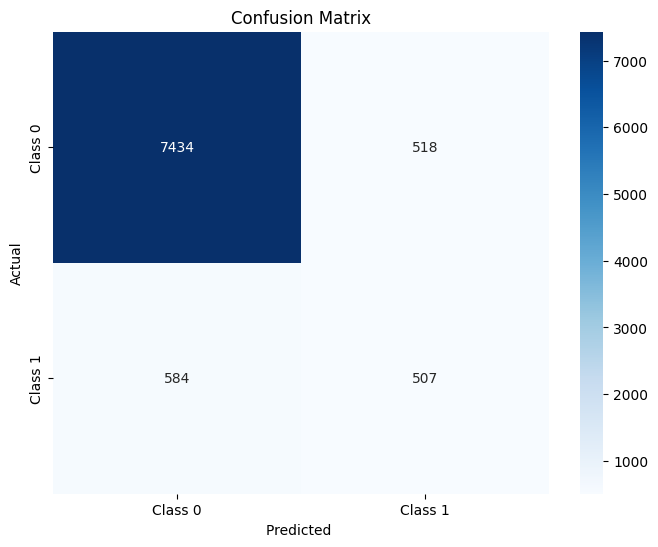

In [47]:
# Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

threshold = 0.5
y_pred_nn_tuned = (y_pred_prob > threshold).astype(int)

# confusion matrix
cm = confusion_matrix(y_test, y_pred_nn_tuned)


print("\nConfusion Matrix:")
print(cm)

# confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted ")
plt.ylabel("Actual")
plt.show()